In [26]:
import numpy as np
import pandas as pd
import pickle

In [27]:
ApparelData = pd.read_csv('apparel-trainval.csv',sep=',',index_col = False)

In [74]:
#ApparelData.iloc[:,1:] = ApparelData.iloc[:,1:]/255

In [28]:
UniqueLabels=np.array([0,1,2,3,4,5,6,7,8,9])
#DataPerClass = {}
DataPerClass = []
for i in UniqueLabels:
    #DataPerClass[i] = ApparelData.loc[ApparelData['label'] == i]
    tempdf = ApparelData.loc[ApparelData['label'] == i]
    DataPerClass.append(tempdf.sample(frac = 0.8))
    print(len(DataPerClass[i]))#+str(" for ")+str(i))
train = pd.concat(DataPerClass, ignore_index= True)
train = train.sample(frac = 1)
val = ApparelData.loc[~ApparelData.index.isin(train.index)]
val = val.sample(frac = 1)

4800
4800
4800
4800
4800
4800
4800
4800
4800
4800


In [12]:
np.max(np.max(train))

255

In [29]:
EncodedLabel = {}
EncodedLabel[0]='T-shirt/top'
EncodedLabel[1]='Trouser'
EncodedLabel[2]='Pullover'
EncodedLabel[3]='Dress'
EncodedLabel[4]='Coat'
EncodedLabel[5]='Sandal'
EncodedLabel[6]='Shirt'
EncodedLabel[7]='Sneaker'
EncodedLabel[8]='Bag'
EncodedLabel[9]='Ankle boot'

In [67]:
inputeLayerSize = 784
hiddenLayerSize = 10
outputLayerSize = 10
numOfHiddenLayers = 5
#initialize weights and biases 
Weights ={}
Biases ={}
hiddenLayerSizes1 = [30,30,30]
numOfHiddenLayers = len(hiddenLayerSizes1)

#method = 'Sigmoid'
#method = 'Relu'
method = 'tanhx'

In [68]:
for i in range(0,len(hiddenLayerSizes1)):
    if(i==0):        
        Weights[i] = np.random.randn(hiddenLayerSizes1[i],inputeLayerSize)*np.sqrt(2/inputeLayerSize)
        Biases[i] = np.random.randn(hiddenLayerSizes1[i],1)*np.sqrt(2/inputeLayerSize)
    else:
        Weights[i] = np.random.randn(hiddenLayerSizes1[i],hiddenLayerSizes1[i-1])*np.sqrt(2/hiddenLayerSizes1[i-1])
        Biases[i] = np.random.randn(hiddenLayerSizes1[i],1)*np.sqrt(2/hiddenLayerSizes1[i-1])

Weights[numOfHiddenLayers] = np.random.randn(outputLayerSize,hiddenLayerSizes1[numOfHiddenLayers-1])*np.sqrt(2/hiddenLayerSizes1[numOfHiddenLayers-1])
Biases[numOfHiddenLayers] = np.random.randn(outputLayerSize,1)*np.sqrt(2/hiddenLayerSizes1[numOfHiddenLayers-1])


In [32]:
for i in Weights:
    Weights[i] = 0.01*Weights[i]

In [ ]:
InitializedWeights = Weights.copy()
InitializedBiases = Biases.copy()

In [47]:
def getSigmoid(x,method):
    if(method == 'Sigmoid'):
        x = np.clip(x,-500,500)
        return 1/(1+np.exp(-x))        
    elif(method == 'Relu'):
        #x = np.clip(x,-500,+500)
        return np.maximum(x, 0)
        #return (abs(x) + x) / 2         
    elif(method == 'tanhx'):
        return (2*(getSigmoid(2*x,'Sigmoid')))-1
    
def getSigmoidDash(x,method):
    if(method == 'Sigmoid'):
        tempDer3 = x.copy()
        tempDer3[tempDer3.all()>-500 and tempDer3.all()<500] = 1.0
        tempDer3[tempDer3.all()>500 and tempDer3.all()<-500] = 0.0
        #tempDer1 = np.array([1.0 if (t.any()>-500 and t.any()<500) else 0.0 for t in x])
        #tempDer1 = tempDer1.reshape(x.shape[0],x.shape[1])
        tempDer2 = getSigmoid(x,method)*(1-getSigmoid(x,method))
        return tempDer2*tempDer3
    elif(method == 'Relu'):
        x[x<=0] = 0
        x[x>0] = 1.0        
        return x
    elif(method == 'tanhx'):
        return (1 - (getSigmoid(x,'tanhx'))**2)

In [76]:
pickle_in = open("Weights.pickle","rb")
Weights = pickle.load(pickle_in)

In [69]:
def getError(givenData,Weights,Biases,numOfHiddenLayers,istrain):
    Xmatrix1 = givenData.iloc[:,1:].values
    z1 = {}
    for i in range(0,numOfHiddenLayers+1):#np.reshape(a, (3,1))
        if(i==0):
            z1[i] = (Weights[i]@getSigmoid(Xmatrix1.T,method))+Biases[i]   
        else:
            z1[i]= (Weights[i]@getSigmoid(z1[i-1],method))+Biases[i]
    z1[numOfHiddenLayers] = np.clip(z1[numOfHiddenLayers],-500,500)
    Yhat1 = (np.exp(z1[numOfHiddenLayers]))/(np.sum(np.exp(z1[numOfHiddenLayers]), axis=0)[None,:])
    valYvector1 = givenData.iloc[:,0].values
    
    
    if(istrain == 'yes'):
        UniqueLabels=np.array([0,1,2,3,4,5,6,7,8,9])
        #creating indicator vectors
        YvectorModified1 = (valYvector1[:,None]==UniqueLabels).astype(int).T
        Yhat1[Yhat1==0] = 1e-10
        Cost = np.sum(-1*YvectorModified1*np.log(Yhat1))#/batchSize
        print(Cost)
        
    
    PredictedLabelsForTest1 = np.argmax(Yhat1, axis=0) 
    conMatrix = pd.crosstab(valYvector1,PredictedLabelsForTest1)
    sum1 = 0
    for temp25 in np.unique(valYvector1):
        for temp26 in np.unique(PredictedLabelsForTest1):
            if temp25==temp26:
                sum1 += conMatrix[temp25][temp26] 
    Accuracy = (sum1/np.sum(np.sum(conMatrix)))
    return (1-Accuracy)

In [ ]:
TrainErrorInEachEpoch = []
ValErrorInEachEpoch = []
numOfIterInEachEpochs = 200
batchSize = 240
for epoch in range(0,50):
    print("Epoch is "+str(epoch))
    for j in range(0,numOfIterInEachEpochs):
        #print("Iteration is "+str(j))
        Xmatrix = train.iloc[0+(j*batchSize):batchSize+(j*batchSize),1:].values    
        Yvector = train.iloc[0+(j*batchSize):batchSize+(j*batchSize),0].values
        #print(str(0+(j*batchSize))+str(" - ")+str(batchSize+(j*batchSize)))
        #forward pass
        z = {}
        z[-1] = Xmatrix.T
        for i in range(0,numOfHiddenLayers+1):#np.reshape(a, (3,1))
            if(i==0):
                z[i] = (Weights[i]@getSigmoid(Xmatrix.T,method))+Biases[i]        
            else:                
                #z[i-1] = np.clip( z[i-1], -500, +500 )
                #z[i]= (Weights[i]@(1./(1+np.exp(-1*z[i-1]))))+Biases[i]
                z[i]= (Weights[i]@getSigmoid(z[i-1],method))+Biases[i]
                
        z[numOfHiddenLayers] = np.clip(z[numOfHiddenLayers],-500,+500)
        Yhat = (np.exp(z[numOfHiddenLayers]))/(np.sum(np.exp(z[numOfHiddenLayers]), axis=0)[None,:])
        UniqueLabels=np.array([0,1,2,3,4,5,6,7,8,9])
        #creating indicator vectors
        YvectorModified = (Yvector[:,None]==UniqueLabels).astype(int).T
        #Yhat[Yhat==0] = 1e-10
        #Cost = np.sum(-1*YvectorModified*np.log(Yhat))#/batchSize
        
        #if(j==(numOfIterInEachEpochs-1)):
        #print(Cost)
        
        #backwardprop
        
        GradWeights = {}
        GradBiases = {}

        DcostDAct = {}

        DcostDAct[numOfHiddenLayers-1] = ((Weights[numOfHiddenLayers].T)@(Yhat-YvectorModified))
        
        for temp3 in range(numOfHiddenLayers-2,-1,-1):
            DcostDAct[temp3] = (Weights[temp3+1].T)@(getSigmoidDash(z[temp3+1],method)*DcostDAct[temp3+1])                
        
        GradWeights[numOfHiddenLayers] = (Yhat-YvectorModified)@(getSigmoid(z[numOfHiddenLayers-1].T,method))
        GradBiases[numOfHiddenLayers] = (Yhat-YvectorModified).sum(axis=1)
        
        for temp1 in range(numOfHiddenLayers-1,-1,-1):
            GradWeights[temp1] = ((getSigmoidDash(z[temp1],method)*DcostDAct[temp1])@getSigmoid(z[temp1-1].T,method))
            GradBiases[temp1] = (getSigmoidDash(z[temp1],method)*DcostDAct[temp1]).sum(axis=1)
            
        #GradWeights[0] = ((getSigmoidDash(z[0],method)*DcostDAct[0])@(getSigmoid(z[-1].T,'Sigmoid')))
        #GradBiases[0] = (getSigmoidDash(z[0],method)*DcostDAct[0]).sum(axis=1) 
      
        for item in GradBiases:
            GradBiases[item] = GradBiases[item].reshape(GradBiases[item].shape[0],1)
          
        
       
        #finding gradients and updating weights and biases      
            
        for temp6 in Weights:
            Weights[temp6] =  Weights[temp6] - (0.0005*GradWeights[temp6])
        for temp7 in Biases:
            Biases[temp7] = Biases[temp7] - (0.0005*GradBiases[temp7]) #*(1/batchSize)           
        
    #trainError = getError(train,Weights,Biases,numOfHiddenLayers,'yes')
    valError = getError(val,Weights,Biases,numOfHiddenLayers,'no')
    #TrainErrorInEachEpoch.append(trainError)
    ValErrorInEachEpoch.append(valError)
    #print(trainError)
    print(valError)
    #if(valError > trainError):
     #   break


In [41]:
pickle_out = open("WeightsRelu.pickle","wb")
pickle.dump(Weights, pickle_out)
pickle_out.close()

In [60]:
#Xmatrix1 = ApparelTestData.values
Xmatrix1 = val.iloc[:,1:].values
z1 = {}
for i in range(0,numOfHiddenLayers+1):#np.reshape(a, (3,1))
    if(i==0):
        z1[i] = (Weights[i]@getSigmoid(Xmatrix1.T,method))+Biases[i]   
    else:
        z1[i]= (Weights[i]@getSigmoid(z1[i-1],method))+Biases[i]
        #print(i)
        #print(z[i].shape)
#finding outputs using softmax
#z1[-1] = Xmatrix1.T
z1[numOfHiddenLayers] = np.clip(z1[numOfHiddenLayers],-500,500)
Yhat1 = (np.exp(z1[numOfHiddenLayers]))/(np.sum(np.exp(z1[numOfHiddenLayers]), axis=0)[None,:])
valYvector = val.iloc[:,0].values
PredictedLabelsForTest = np.argmax(Yhat1, axis=0) 
print(np.unique(PredictedLabelsForTest))
conMatrix = pd.crosstab(valYvector,PredictedLabelsForTest)
conMatrix

[0 1 2 3 4 5 6 7 8 9]


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,949,1,48,152,11,2,18,0,18,0
1,0,1079,20,87,23,0,3,0,1,0
2,13,0,880,14,303,1,3,0,18,0
3,31,12,28,1069,55,0,4,0,4,0
4,1,7,315,129,752,0,2,0,9,0
5,0,0,1,1,0,909,0,191,6,57
6,283,3,286,106,406,4,38,0,41,0
7,0,0,0,0,0,18,0,1042,1,126
8,2,0,29,45,3,21,2,11,1097,2


In [ ]:
ApparelTestData = pd.read_csv('apparel-test.csv',sep=',',index_col = False)
Xmatrix1 = ApparelTestData.values
z1 = {}
for i in range(0,numOfHiddenLayers+1):#np.reshape(a, (3,1))
    if(i==0):
        z1[i] = (Weights[i]@getSigmoid(Xmatrix1.T,method))+Biases[i]   
    else:
        #if method == sigmoid:
        #z1[i-1] = np.clip( z1[i-1], -500, 500 )
        z1[i]= (Weights[i]@getSigmoid(z1[i-1],method))+Biases[i]
        #print(i)
        #print(z[i].shape)
#finding outputs using softmax
#z1[-1] = Xmatrix1.T
#z1[numOfHiddenLayers] = np.clip(z1[numOfHiddenLayers],-500,500)
Yhat1 = (np.exp(z1[numOfHiddenLayers]))/(np.sum(np.exp(z1[numOfHiddenLayers]), axis=0)[None,:])
PredictedLabelsForTest = np.argmax(Yhat1, axis=0) 
ApparelTestData.insert(loc=0, column='labels', value=PredictedLabelsForTest)
import matplotlib.pyplot as plt
for index, row in ApparelTestData.iterrows():#.loc[0:20,:]
    #for j in ApparelDataSample.columns:
    label = row[0]
    pixels = row[1:]
    # Make those columns into a array of 8-bits pixels
    # This array will be of 1D with length 784
    # The pixel intensity values are integers from 0 to 255
    pixels = np.array(pixels, dtype='uint8')
    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((28,28))
    plt.title('figure show below is {label}'.format(label=EncodedLabel[label]+str(label)))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    #break

In [118]:
len(ApparelTestData)

9674

In [38]:
import matplotlib.pyplot as plt

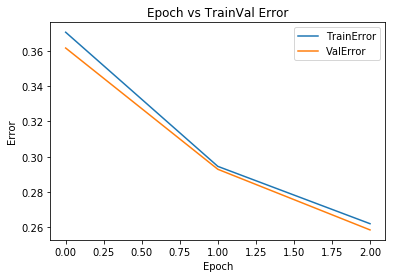

In [61]:
fig, ax = plt.subplots()
#for i in enumerate(thresholdValues):
#TrainErrorInEachEpoch
#ValErrorInEachEpoch
ax.plot(range(0,len(TrainErrorInEachEpoch[:])),TrainErrorInEachEpoch[:], label='TrainError')
ax.plot(range(0,len(ValErrorInEachEpoch[:])),ValErrorInEachEpoch[:], label='ValError')
ax.legend(loc=1) # upper left corner
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.set_title('Epoch vs TrainVal Error');

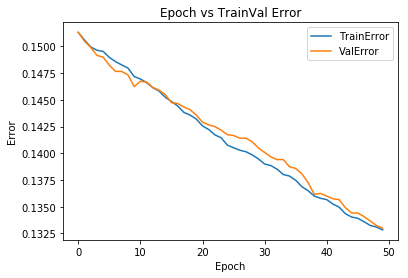

In [55]:
fig, ax = plt.subplots()
#for i in enumerate(thresholdValues):
#TrainErrorInEachEpoch
#ValErrorInEachEpoch
ax.plot(range(0,len(TrainErrorInEachEpoch[:])),TrainErrorInEachEpoch[:], label='TrainError')
ax.plot(range(0,len(ValErrorInEachEpoch[:])),ValErrorInEachEpoch[:], label='ValError')
ax.legend(loc=1) # upper left corner
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.set_title('Epoch vs TrainVal Error');

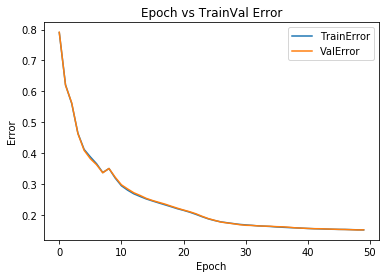

In [50]:
fig, ax = plt.subplots()
#for i in enumerate(thresholdValues):
#TrainErrorInEachEpoch
#ValErrorInEachEpoch
ax.plot(range(0,len(TrainErrorInEachEpoch[:])),TrainErrorInEachEpoch[:], label='TrainError')
ax.plot(range(0,len(ValErrorInEachEpoch[:])),ValErrorInEachEpoch[:], label='ValError')
ax.legend(loc=1) # upper left corner
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.set_title('Epoch vs TrainVal Error');

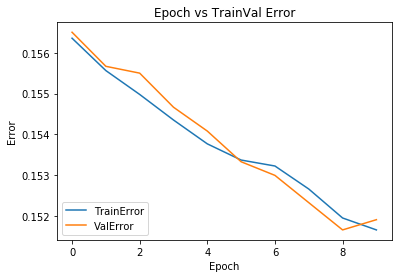

In [51]:
fig, ax = plt.subplots()
#for i in enumerate(thresholdValues):
#TrainErrorInEachEpoch
#ValErrorInEachEpoch
ax.plot(range(0,len(TrainErrorInEachEpoch[40:])),TrainErrorInEachEpoch[40:], label='TrainError')
ax.plot(range(0,len(ValErrorInEachEpoch[40:])),ValErrorInEachEpoch[40:], label='ValError')
ax.legend(loc=3) # upper left corner
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.set_title('Epoch vs TrainVal Error');

 print('shape of Biases after update')    
        for item in Biases:
            print(Biases[item].shape)
   print('shape of Biases before update')    
        for item in Biases:
            print(Biases[item].shape)

  
        print('shape of GradBiases')
        for item in GradBiases:
            print(GradBiases[item].shape)
        
            

In [52]:
A=np.array([[1,2],[3,4]])
A[A.any()>=2 and A.any()<=3] = 999
A

array([[1, 2],
       [3, 4]])

In [180]:
1+2

3

In [114]:
ApparelTestData = pd.read_csv('apparel-test.csv',sep=',',index_col = False)
Xmatrix1 = ApparelTestData.values
z1 = {}
for i in range(0,numOfHiddenLayers+1):#np.reshape(a, (3,1))
    if(i==0):
        z1[i] = (Weights[i]@getSigmoid(Xmatrix1.T,method))+Biases[i]   
    else:
        #if method == sigmoid:
        #z1[i-1] = np.clip( z1[i-1], -500, 500 )
        z1[i]= (Weights[i]@getSigmoid(z1[i-1],method))+Biases[i]
        #print(i)
        #print(z[i].shape)
#finding outputs using softmax
#z1[-1] = Xmatrix1.T
#z1[numOfHiddenLayers] = np.clip(z1[numOfHiddenLayers],-500,500)
Yhat1 = (np.exp(z1[numOfHiddenLayers]))/(np.sum(np.exp(z1[numOfHiddenLayers]), axis=0)[None,:])
PredictedLabelsForTest = np.argmax(Yhat1, axis=0) 

In [63]:
import sys
orig_stdout = sys.stdout
f = open('predict.csv', 'w')
sys.stdout = f
for index,value in enumerate(PredictedLabelsForTest):
    print(str(index)+')'+str(value))
sys.stdout = orig_stdout
f.close()